In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q datasets pandas numpy matplotlib seaborn

LOADING DATASET


In [3]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("Tobi-Bueck/customer-support-tickets")
df = pd.DataFrame(ds["train"])

df = df[["body", "queue"]].dropna()
df.head()


README.md: 0.00B [00:00, ?B/s]

aa_dataset-tickets-multi-lang-5-2-50-ver(…):   0%|          | 0.00/26.0M [00:00<?, ?B/s]

(…)set-tickets-german_normalized_50_5_2.csv: 0.00B [00:00, ?B/s]

dataset-tickets-multi-lang-4-20k.csv:   0%|          | 0.00/18.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/61765 [00:00<?, ? examples/s]

,body,queue
0,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Technical Support
1,"Dear Customer Support Team,\n\nI am writing to...",Technical Support
2,"Dear Customer Support Team,\n\nI hope this mes...",Returns and Exchanges
3,"Dear Customer Support Team,\n\nI hope this mes...",Billing and Payments
4,"Dear Support Team,\n\nI hope this message reac...",Sales and Pre-Sales


DATASET INSPECTION


In [4]:
df.shape


(61763, 2)

In [5]:
df["queue"].value_counts()


,count
queue,
Technical Support,14186
Product Support,8958
Customer Service,7420
IT Support,5725
Billing and Payments,4874
Returns and Exchanges,2438
Service Outages and Maintenance,1912
Sales and Pre-Sales,1490
Human Resources,914


In [6]:
df.isnull().sum()

,0
body,0
queue,0


*The dataset consists of customer ticket text (body) and corresponding department labels (queue).*

TEXT LENGTH ANALYSIS

In [7]:
df["text_length"] = df["body"].astype(str).apply(lambda x: len(x.split()))
df["text_length"].describe()

,text_length
count,61763.000000
mean,57.364458
std,31.029814
min,1.000000
25%,31.000000
50%,57.000000
75%,82.000000
max,281.000000


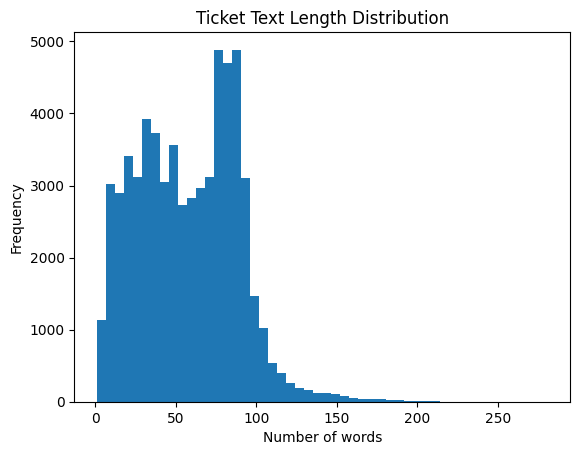

In [8]:
import matplotlib.pyplot as plt

plt.hist(df["text_length"], bins=50)
plt.title("Ticket Text Length Distribution")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()